# Multiple Regression

Shows how to calculate just the best fit, or - using "statsmodels" - all the
corresponding statistical parameters.

Also shows how to make 3d plots.

Author: Thomas Haslwanter, Date:   June-2014

In [1]:
# The standard imports
%pylab inline
import pandas as pd
# For the 3d plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For the statistic
from statsmodels.formula.api import ols

Populating the interactive namespace from numpy and matplotlib


## Generate and show the data

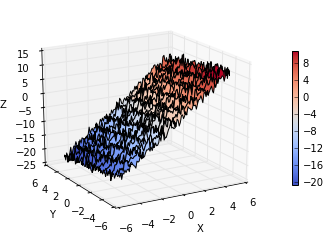

In [2]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)

## Simple plane fit

In [3]:
M = np.vstack((np.ones(len(X)), X, Y)).T
bestfit = np.linalg.lstsq(M,Z)[0]
print('Best fit plane:', bestfit)

Best fit plane: [[ -5.74912282e+11  -1.75872528e+12   3.17182005e+12 ...,   2.99505316e+12
   -2.60722519e+12  -3.63820719e+12]
 [  6.74347051e+12   3.25723852e+12   1.18048529e+12 ...,   2.85945131e+12
    4.25847201e+12  -7.15905782e+11]
 [ -6.74347051e+10  -3.25723852e+10  -1.18048529e+10 ...,  -2.85945131e+10
   -4.25847201e+10   7.15905782e+09]
 ..., 
 [ -1.18283135e+11  -5.09176638e+10  -3.44400389e+10 ...,  -6.37486390e+10
   -6.52769497e+10   2.80822385e+10]
 [  1.85305412e+09   8.80777842e+09  -1.71594215e+10 ...,  -1.65183941e+10
    1.31601447e+10   1.95672432e+10]
 [ -2.26624727e+10  -4.42112365e+09  -1.83854675e+10 ...,  -2.38797324e+10
   -4.42357522e+09   1.87045408e+10]]


## Multilinear regression model

In [4]:
# calculate fit, P-values, confidence intervals etc.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})

# Fit the model
model = ols("z ~ x + y", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.016e+05
Date:                Mon, 30 Nov 2015   Prob (F-statistic):               0.00
Time:                        00:02:34   Log-Likelihood:                -14481.
No. Observations:               10201   AIC:                         2.897e+04
Df Residuals:                   10198   BIC:                         2.899e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.9900      0.010   -503.597      0.0